### 1.0 -Load libraries
In our Second Hand Car Price Prediction project we used SXBoost, mada score

In [110]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # library for visualization
import seaborn as sns # library for visualization
import warnings
import os
import csv 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

warnings.filterwarnings('ignore')
sns.set_palette('Spectral')
sns.set_context('notebook', font_scale=1)
sns.set_style('whitegrid')
# set pandas 3 digits decimal
pd.set_option('display.float_format', '{:.3f}'.format)

<p> Note to self: <br>
1- Load the initial data, clean car data that can cause false calculations. + <br>
2- Edit all the data into ML friendly numerical values. <--- <br>
3- Fill, complete missing values <br>
4- Try the ML algorithms: KNN, XGBoost, min-max norm, <br>
5- Start building the web app
</p>

<h4> 1.1 Load the available data </h4>

In [111]:
dir = 'vehicles-random-subset-ThisOne-minMaxNorm.csv'
with open(dir, mode='r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader, None)
    
# print first 5 recording of data
df=pd.read_csv(dir)
df.columns = df.columns.str.lower()  # Convert all column names to lowercase
print(df.head(5))
print()
print(df.columns)


   year manufacturer            model   condition      cylinders fuel  \
0 0.000         ford         m-deluxe   excellent  '6 cylinders'  gas   
1 0.000    chevrolet   'm-3100 truck'        good  '6 cylinders'  gas   
2 0.000         ford          m-sedan        good  '8 cylinders'  gas   
3 0.000    chevrolet  'm-sport coupe'   excellent  '8 cylinders'  gas   
4 0.000    chevrolet  'm-sport coupe'  'like new'  '8 cylinders'  gas   

   odometer title_status transmission drive       size   type paint_color  \
0     0.002        clean       manual   rwd  full-size  sedan       black   
1     0.003        clean       manual   rwd  full-size  truck       green   
2     0.005        clean       manual   fwd   mid-size  sedan       green   
3     0.001        clean    automatic   rwd   mid-size  coupe      yellow   
4     0.001        clean    automatic   rwd   mid-size  coupe      yellow   

   price  
0   9500  
1  16000  
2  18000  
3  22000  
4  22000  

Index(['year', 'manufacturer', 

#### 1.2 Scrape data from internet and append the data to available data

This is done to increase amount of data and to increase coherence.

In [112]:
#get further data, clean it and then append to the vehicles-random-subset.csv
# ATTRIBUTES ARE:
#['year','manufacturer','model','condition','cylinders','fuel','odometer','title_status','transmission','drive','size','type','paint_color','price']

### Conversion of categorical data into numerical data

In [113]:
# Columns to encode
columns_to_encode = ['manufacturer', 'model', 'condition','cylinders', 'fuel', 'title_status','transmission', 'size', 'type','paint_color']

# One-hot encode the specified columns
df_encoded = pd.get_dummies(df, columns=columns_to_encode)
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)
# Display the transformed DataFrame
print(df_encoded.head(5))



   year  odometer drive  price  manufacturer_alfa-romeo  \
0 0.000     0.002   rwd   9500                    False   
1 0.000     0.003   rwd  16000                    False   
2 0.000     0.005   fwd  18000                    False   
3 0.000     0.001   rwd  22000                    False   
4 0.000     0.001   rwd  22000                    False   

   manufacturer_aston-martin  manufacturer_audi  manufacturer_bmw  \
0                      False              False             False   
1                      False              False             False   
2                      False              False             False   
3                      False              False             False   
4                      False              False             False   

   manufacturer_buick  manufacturer_cadillac  ...  paint_color_brown  \
0               False                  False  ...              False   
1               False                  False  ...              False   
2             

## HANDLING MISSING VALUES

Skewness: 39.197325787865374


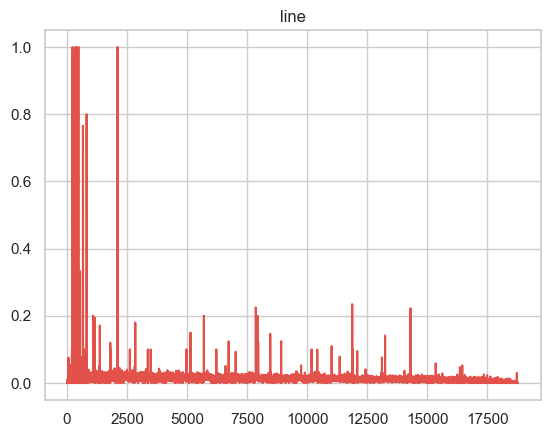

year       -2.453
odometer   39.197
price       2.333
dtype: float64


In [114]:
import matplotlib.pyplot as plt
skewness = df['odometer'].skew()
print(f"Skewness: {skewness}")
df['odometer'].plot(kind='line')
plt.title('line')
plt.show()
df['odometer'] = df['odometer'].fillna(df['odometer'].median()) # HANDLING FOR SKEWED DATA
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(df[numerical_cols].skew())

df['year'] = df['year'].fillna(df['year'].mean()) # HANDLING FOR SYMMETRIC DATA

<h4> FILLING MISSING VALUES FOR CATEGORICAL DATA </h4>

In [ ]:
from sklearn.impute import KNNImputer
#cylinders(other), fuel(other), odometer(<=124), type(other)
# Using KNN imputer (works well for numerical columns, but can also be used for categorical data)
imputer = KNNImputer(n_neighbors=5)
df['cylinders'] = imputer.fit_transform(df[['cylinders', 'model', 'fuel', 'condition', 'transmission', 'drive', 'title_status', 'size', 'type']])


ValueError: could not convert string to float: "'6 cylinders'"

### 2.0 Train/Test splitting

All the collected data needs to be split to test, train. We will split 20/80 = test/train

In [106]:
#features (X) and target (y)
X = df.drop(columns='price')
y = df['price']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### XGBoost regressor

In [107]:
import xgboost
print(xgboost.__version__)
# Train an XGBoost regressor model
xgb_model = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_model.fit(X_train, y_train)

2.1.3


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:manufacturer: object, model: object, condition: object, cylinders: object, fuel: object, title_status: object, transmission: object, drive: object, size: object, type: object, paint_color: object